# Mentoring 1 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. Submit your result to the submission form

## Dataset Description
---

**Note**

- This dataset originally comes from [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)
- We perform several edit for this mentoring purposes. So, please use the dataset from [here](https://drive.google.com/file/d/1-Fr3OMbI1yKU_jNy-6cgXFJDVzjph3sn/view?usp=sharing).


**Description**
- We're looking to predict the fare of Uber's transactions.
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`order_id`| `int` | a unique identifier for each trip|
|`pickup_time` | `str` | a class of pickup time. `04-10`, `10-16`, `16-22`, `22-04`. E.g. `04-10` means the pickup time is between 04.00 to 10.00|
| `pickup_longitude` | `float` | the longitude where the meter was engaged|
| `pickup_latitude` | `float` | the latitude where the meter was engaged|
| `dropoff_longitude` | `float` | the longitude where the meter was disengaged|
| `dropoff_latitude` | `float` | the latitude where the meter was disengaged|
| `passenger_count` | `float` | the number of passengers in the vehicle (driver entered value)|
| `fare_amount` | `int` | the cost of each trip in USD, (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
```

### 1. Import data to Python (10 pts)
---

In [2]:
# import gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
####################################################
# Import Numpy and Pandas library
# Write your code here
####################################################
import numpy as np
import pandas as pd

In [4]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `order_id`, keep the last ones
# - Set `order_id` as index
# - Print the data shape
# - Return the dataset
# Write your code here
####################################################
def read_data(fname):
    """
    Fungsi untuk import data dan drop duplicate
    :param fname: <string> nama file input (format .csv)
    :return df: <pandas dataframe> sample data
    """

    # read data
    df = pd.read_csv(fname)
    print("Data shape raw               :", df.shape)

    # check number of duplicat 'order_id'
    oid_duplicate = df["order_id"].duplicated().sum()
    print("Number of duplicate order id :", oid_duplicate)

    # drop duplicate on 'order_id'
    df["order_id"].drop_duplicates(inplace=True)
    print("Data shape after dropping    :", df.shape)

    # set 'order_id' as index
    df.set_index(["order_id"], inplace = True)
    print("Data shape final             :", df.shape)

    # data shape 'order_id' as index
    return df

In [5]:
# Read the Uber data
data = read_data(fname='gdrive/MyDrive/Pacmann Academy/JPP Max Data Science/4. Basic & Advanced Machine Learning/Mentoring/uber_edit.csv')

Data shape raw               : (194814, 8)
Number of duplicate order id : 0
Data shape after dropping    : (194814, 8)
Data shape final             : (194814, 7)


In [6]:
# Check the data
data.head()

,fare_amount,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,,
24238194,7.5,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,7.7,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,12.9,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,5.3,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16.0,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


### 2. Data Preprocessing (60 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Separate Numerical and Categorical Features
2.4 Numerical Imputation
2.5 Categorical Imputation
2.6 Preprocess Categorical Features
2.7 Join the Data
2.8 Feature Engineering the Data
2.9 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (6 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [7]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################
def split_input_output(data, target_col):
    """
    Fungsi ini untuk melakukan split data input dan output
    :param data: <pandas dataframe> sample data input
    :target_col: <string> column target (y)
    """
    # create input data (take out the target)
    input_data = data.drop([target_col], axis=1)
    print("X shape:", input_data.shape)

    # create output data
    output_data = data[target_col]
    print("y shape:", output_data.shape)

    return input_data, output_data

In [8]:
# Load the train data only
X, y = split_input_output(data=data,
                          target_col='fare_amount')

X shape: (194814, 6)
y shape: (194814,)


In [9]:
X.head()  # Check input data

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
24238194,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


In [10]:
y.head()  # Check target data

,fare_amount
order_id,
24238194,7.5
27835199,7.7
44984355,12.9
25894730,5.3
17610152,16.0


#### 2.2. Train-Valid-Test Split (6 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [11]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size, seed):
    """
    Fungsi ini untuk membagi data train dan test
    :param X: <pandas dataframe> data input
    :param y: <pandas dataframe> data output
    :return X_train: <pandas dataframe> data train input
    :return X_test: <pandas dataframe> data test input
    :return y_train: <pandas dataframe> data train output
    :return y_test: <pandas dataframe> data test output
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    print(f"X train shape: {X_train.shape}")
    print(f"y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"y test shape: {y_test.shape}\n")

    return X_train, X_test, y_train, y_test

In [12]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.2, seed=123) # WRITE YOUR CODE HERE, Use seed=123

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size=0.5, seed=123) # WRITE YOUR CODE HERE, Use seed=123

X train shape: (155851, 6)
y train shape: (155851,)
X test shape: (38963, 6)
y test shape: (38963,)

X train shape: (19481, 6)
y train shape: (19481,)
X test shape: (19482, 6)
y test shape: (19482,)



In [13]:
# Validate
print(round(len(X_train)/len(X), 1))  # should be 0.8
print(round(len(X_valid)/len(X), 1))  # should be 0.1
print(round(len(X_test)/len(X), 1))  # should be 0.1

0.8
0.1
0.1


In [14]:
X_train.head()  # Check the data

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0


#### 2.3. Separate Numerical and Categorical Features (6 pts)
---

- We now prepare to perform data preprocessing
- But, we first separate the data into numerical data & categorical data.

In [15]:
####################################################
# Create a function to split numerical & categorical input
# - you have three parameters
#   - data, an input data (pd. Dataframe)
#   - num_cols, a list of numerical columns (list)
#   - cat_cols, a list of categorical columns (list)
# - and write a validation that you perform right operation
# - and return two dataframe, numerical & categorical data
# Write your code here
####################################################
def split_numerical_categorical(data, num_cols, col_cats):
    """
    Fungsi ini untuk melakukan split data input numerical dan kategorikal
    :param data: <pandas dataframe> data input
    :param num_cols: <list> kolom numerikal
    :param col_cats: <list> kolom kategorikal
    """

    # ambil data numerikal
    X_train_num = data[num_cols]

    # ambil data kategorikal
    X__train_cat = data[col_cats]

    # print shape
    print(f"Data num shape: {X_train_num.shape}")
    print(f"Data cat shape: {X__train_cat.shape}")

    return X_train_num, X__train_cat

In [16]:
# decide the num and cat collumns:
num_cols = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]
col_cats = ["pickup_time"]

# Split the data
X_train_num, X_train_cat = split_numerical_categorical(data=X_train, num_cols=num_cols, col_cats=col_cats)  #WRITE YOUR CODE HERE

Data num shape: (155851, 5)
Data cat shape: (155851, 1)


In [17]:
X_train_num.head()  # Check the data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0


In [18]:
X_train_cat.head() # Check the data

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [19]:
(X_train.isna().sum()/len(X_train))*100

,0
pickup_time,0.000000
pickup_longitude,0.000000
pickup_latitude,0.000000
dropoff_longitude,0.000000
dropoff_latitude,0.000000
passenger_count,0.606348


- We will impute all these variables if there is any missing value

- First, check the numerical features distribution

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

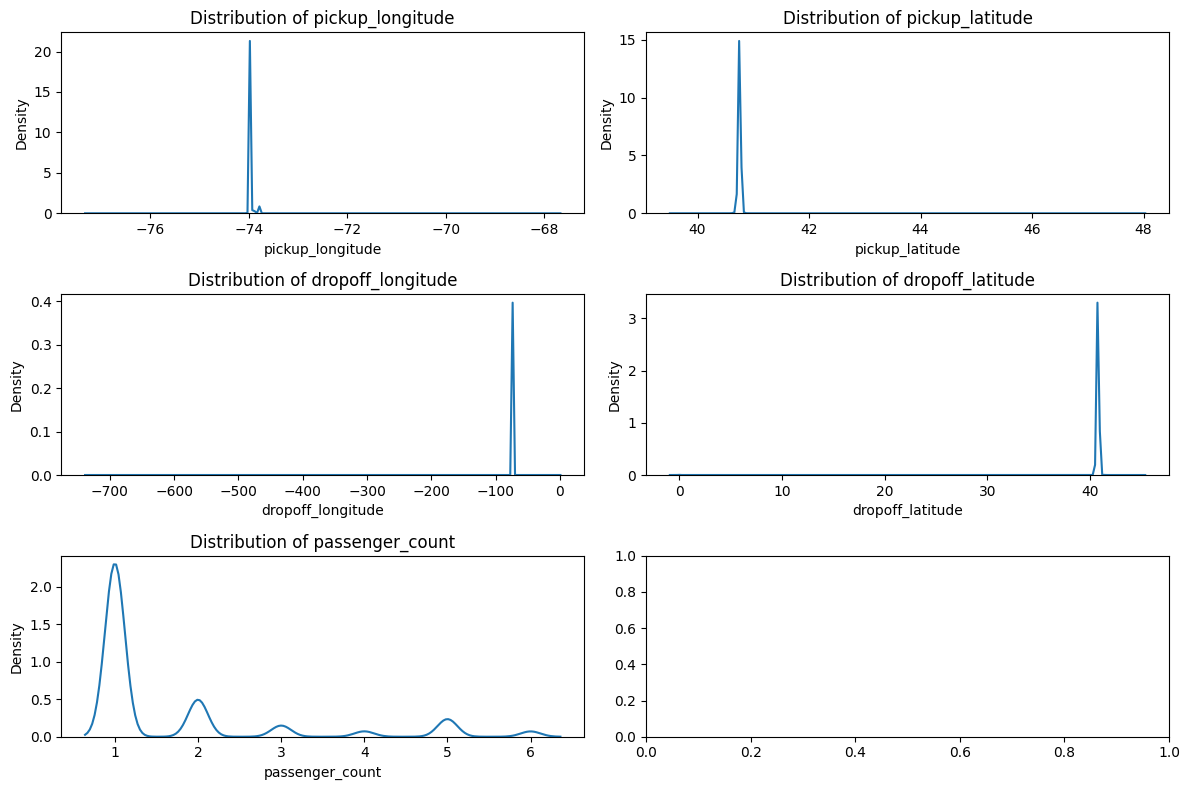

In [21]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- All the distribution are skewed, we can impute a missing value by its features median.

- Next, explore the `pickup_time`

In [22]:
X_train['pickup_time'].value_counts(normalize=True)

,proportion
pickup_time,
16-22,0.328160
10-16,0.286376
22-04,0.221648
04-10,0.157599
-,0.006217


- There's a missing value with symbol `'-'` in `pickup_time`,
- We can impute the missing value with `UNKNOWN`

- Explore the relation between `pickup_time` and `fare`

In [23]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
order_id,,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0,16.5
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0,3.7
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0,18.9
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0,4.1
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0,5.0


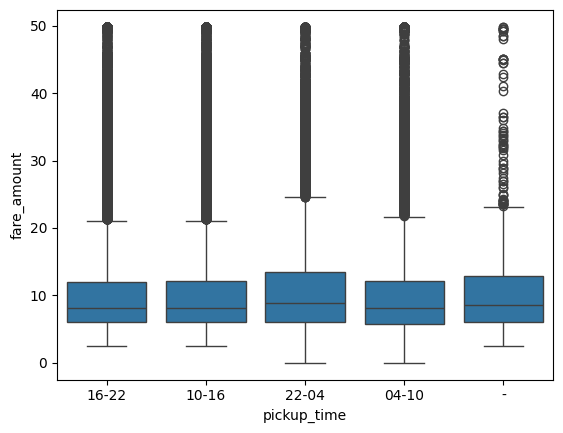

In [24]:
# Create a boxplot
sns.boxplot(data=train_data[train_data['fare_amount'] < 50],
            x='pickup_time',
            y='fare_amount')
plt.show()

- There is no significant fare different between `pickup_time`.
- We can perform a one hot encoding for this data.

**Conclusion for preprocessing**
- Impute the missing `passenger_counts` with its median
- Impute the missing `pickup_time` with `'UNKNOWN'`
- Feature engineering the `dropoff` and `pickup` coordinate to be a distance between pickup and dropoff. We can use an Euclidean distance for simplicity.

#### 2.4. Numerical Imputation (6 pts)
---

- Now, let's perform a numerical imputation
- First check the missing value of the numerical data

In [25]:
# Check missing value
X_train_num.isna().sum(0)

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,945


- Create a function to fit a numerical features imputer

In [26]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
def num_imputer_fit(data):
    """
    Fungsi ini untuk melakukan imputer pada data
    :param data: <pandas dataframe> data input
    :return imputer_numerical: imputer numerical method
    """

    # import package
    from sklearn.impute import SimpleImputer

    # buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan, strategy = "median")
    imputer_numerical.fit(data)

    return imputer_numerical


def num_imputer_transform(data, imputer):
    """
    Fungsi ini untuk melakukan transform pada data
    :param data: <pandas dataframe> data input
    :param imputer: imputer numerical method
    :return numerical data_imputed
    """
    # Transform
    imputed_data = imputer.transform(data)
    numerical_data_imputed = pd.DataFrame(imputed_data, index=data.index, columns=data.columns)

    return numerical_data_imputed

- Perform imputation

In [27]:
# Get the numerical imputer
num_imputer = num_imputer_fit(data=X_train_num) # WRITE YOUR CODE HERE

# Transform the data
X_train_num_imputed = num_imputer_transform(data=X_train_num, imputer=num_imputer) # WRITE YOUR CODE HERE

In [28]:
# Validate
X_train_num_imputed.isna().sum(0)

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


Great!

#### 2.5. Categorical Imputation (6 pts)
---

- Next, let's perform the categorical imputation

In [29]:
# Check missing value
X_train_cat.value_counts(normalize=True)

,proportion
pickup_time,
16-22,0.328160
10-16,0.286376
22-04,0.221648
04-10,0.157599
-,0.006217


- Create a function to fit a categorical features imputer

In [30]:
####################################################
# Create function to fit & transform categorical imputers
# The fit function is called by cat_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is '-'
# - the imputation strategy is filling it with 'UNKNOWN'
# - it return the imputer
#
# The transform function is called by cat_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
def cat_imputer_fit(data):
    """
    Fungsi ini untuk melakukan imputer pada data
    :param data: <pandas dataframe> data input
    :return imputer_categorical: imputer categorical method
    """
    # import package
    from sklearn.impute import SimpleImputer

    # buat imputer
    imputer_categorical = SimpleImputer(missing_values = "-", strategy="constant", fill_value="UNKNOWN")
    imputer_categorical.fit(data)

    return imputer_categorical

def cat_imputer_transform(data, imputer):
    """
    Fungsi ini untuk melakukan transform pada data
    :param data: <pandas dataframe> data input
    :param imputer: imputer categorical method
    :return categorical data_imputed
    """
    # Transform
    imputed_cat_data = imputer.transform(data)
    cat_data_imputed = pd.DataFrame(imputed_cat_data, index=data.index, columns=data.columns)

    return cat_data_imputed

- Perform imputation

In [31]:
# Perform categorical imputation
cat_imputer = cat_imputer_fit(data=X_train_cat) # WRITE YOUR CODE HERE

# Transform
X_train_cat_imputed = cat_imputer_transform(data=X_train_cat, imputer=cat_imputer) # WRITE YOUR CODE HERE

In [32]:
# Validate
X_train_cat_imputed.value_counts(normalize=True)

,proportion
pickup_time,
16-22,0.328160
10-16,0.286376
22-04,0.221648
04-10,0.157599
UNKNOWN,0.006217


Great!

#### 2.6. Preprocess Categorical Features (6 pts)
---

- We will create a one-hot-encoder (read the `EDA before processing`) for the categorical features
- Create a function to perform a one hot encoder

In [33]:
####################################################
# Write two functions to perform OHE for the categorical data
# The first function is called cat_encoder_fit
# - It needs 1 input, the data (pd.DataFrame)
# - You create an encoder (from OHE Sklearn)
# - input all categories of the categorical data
# - if there is other category outside the categories listed right now, ignore it
# - return the encoder
#
# The second function is called cat_encoder_transfrom
# - It needs two input, the data (pd.DataFrame), the encoder (sklearn object)
# - It transform the input data based on the encoder
# - It returns the encoded data (pd.DataFrame)
#
# Write your code here
####################################################
def cat_encoder_fit(data):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :return categorical_encoder: <pandas dataframe> data sample dengan ohe
    """
    # import OHE
    from sklearn.preprocessing import OneHotEncoder

    # create encoder
    categorical_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    categorical_encoder.fit(data)

    return categorical_encoder

def cat_encoder_transform(data, encoder):
    """
    Fungsi untuk transform data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param encoder: <pandas dataframe> data sample dengan ohe
    :return categorical_data_encoded: <pandas dataframe> data sample dengan ohe
    """
    # transform
    categorical_data_encoded = encoder.transform(data)
    categorical_data_encoded = pd.DataFrame(categorical_data_encoded, index=data.index, columns=encoder.get_feature_names_out())

    return categorical_data_encoded

- Perform imputation

In [34]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(data=X_train_cat_imputed) # WRITE YOUR CODE HERE

# Transform
X_train_cat_encoded = cat_encoder_transform(data=X_train_cat_imputed, encoder=cat_encoder) # WRITE YOUR CODE HERE

In [35]:
# Validate
print('Original shape:', X_train_cat_imputed.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (155851, 1)
Encoded shape : (155851, 5)


In [36]:
# Validate
X_train_cat_encoded.head()

,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN
order_id,,,,,
51655713,0.0,0.0,1.0,0.0,0.0
37525839,0.0,0.0,1.0,0.0,0.0
55058970,0.0,0.0,1.0,0.0,0.0
15663447,0.0,1.0,0.0,0.0,0.0
13325650,0.0,0.0,1.0,0.0,0.0


In [37]:
# Validate
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


Great!

#### 2.7. Join the data (6 pts)
---

- After all the data is filled (numerically), we can join the data
- Create a function to join the data

In [38]:
####################################################
# Create a function to join / concat the data
# The function is called by concat_data
# - It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
# - Don't forget to validate your process
# - It returns the concated data
#
# Write your code here
####################################################
def concat_data(num_data, cat_data):
  """
  Fungsi untuk menggabungkan data numerikal dan kategorikal
  :param num_data: <pandas dataframe> data numerikal
  :param cat_data: <pandas dataframe> data kategorikal
  :return X_train_concat: <pandas dataframe> data gabungan
  """
  # gabungkan data
  concat_X_train = pd.concat([num_data, cat_data], axis=1)

  # print shape
  print(f"Data num shape: {num_data.shape}")
  print(f"Data cat shape: {cat_data.shape}")
  print(f"Data concat shape: {concat_X_train.shape}\n")

  return concat_X_train

In [39]:
# Concat the data
X_train_concat = concat_data(num_data=X_train_num_imputed, cat_data=X_train_cat_encoded) #WRITE YOUR CODE HERE

Data num shape: (155851, 5)
Data cat shape: (155851, 5)
Data concat shape: (155851, 10)



- Perform concatenated

In [40]:
# Validate
X_train_concat.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN
order_id,,,,,,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0,0.0,0.0,1.0,0.0,0.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0,0.0,0.0,1.0,0.0,0.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0,0.0,0.0,1.0,0.0,0.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0,0.0,1.0,0.0,0.0,0.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0,0.0,0.0,1.0,0.0,0.0


Great!

#### 2.8. Feature engineering the data (8 pts)
---

- Now, `pickup` and `dropoff` coordinate is not an explicit features.
- We can create a better feature called by `distance` to summarize the `pickup` and `dropoff` coordinate.

In [41]:
####################################################
# Create a function that obtain the distance
# The function is called with map_distance
# - It needs an input, data (pd.DataFrame)
# - In the input, you calculate the trip distance using Euclidean Distance
#   ref: https://www.cuemath.com/euclidean-distance-formula/
# - Then, you can save the distance information as a new column, 'distance'
# - And you can drop the pickup and dropoff latitude and longitude
# - You return the mapped data
#
# Write your code here
####################################################
def map_distance(data):
    """
    Calculates the trip distance and adds it as a new column 'distance'.
    Drops the original pickup and dropoff latitude and longitude columns.

    Args:
        data (pd.DataFrame): The input DataFrame containing Uber trip data.

    Returns:
        pd.DataFrame: The modified DataFrame with the 'distance' column.
    """

    print(f"Original data shape: {data.shape}")  # Print original shape

    X_train_fe = data.copy()  # Create a copy of the input data

    # Create new column 'distance' with euclidean formula
    X_train_fe['distance'] = np.sqrt(
              (X_train_fe['dropoff_longitude'] - X_train_fe['pickup_longitude'])**2 +
              (X_train_fe['dropoff_latitude'] - X_train_fe['pickup_latitude'])**2
    )

    X_train_fe = X_train_fe.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

    print(f"Mapped data shape  : {X_train_fe.shape}\n")  # Print shape after mapping

    return X_train_fe

- Perform distance calculation (4 pts)

In [42]:
# Calculate the distance
X_train_concat_fe = map_distance(X_train_concat)# WRITE YOUR CODE HERE

Original data shape: (155851, 10)
Mapped data shape  : (155851, 7)



In [43]:
# Validate
X_train_concat_fe.head()

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
order_id,,,,,,,
51655713,2.0,0.0,0.0,1.0,0.0,0.0,0.073766
37525839,5.0,0.0,0.0,1.0,0.0,0.0,0.008585
55058970,1.0,0.0,0.0,1.0,0.0,0.0,0.075901
15663447,6.0,0.0,1.0,0.0,0.0,0.0,0.007733
13325650,1.0,0.0,0.0,1.0,0.0,0.0,0.011140


- And finally, we standardize the data so that it can perform well during model optimization (4 pts)

In [44]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
from sklearn.preprocessing import StandardScaler

def fit_scaler(data):
    """Fits a StandardScaler to the input data."""
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler

def transform_scaler(data, scaler):
    """Transforms the data using the fitted scaler."""
    scaled_data = scaler.transform(data)
    # Convert back to a pandas DataFrame if needed
    scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)
    return scaled_data

In [45]:
# Fit the scaler
scaler = fit_scaler(X_train_concat_fe) # WRITE YOUR CODE HERE

# Transform the scaler
X_train_clean = transform_scaler(X_train_concat_fe, scaler) # WRITE YOUR CODE HERE

In [46]:
# Validate
X_train_clean.describe().round(4)

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
count,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0383
25%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0340
50%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0311
75%,0.2412,-0.4325,1.5786,1.4308,-0.5336,-0.0791,-0.0256
max,3.3130,2.3120,1.5786,1.4308,1.8739,12.6427,218.5245


Great!

#### 2.9. Create the preprocess function (10 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [47]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_cols, the numerical columns, list
#   - cat_cols, the categorical columns, list
#   - num_imputer, the numerical imputer, sklearn object
#   - cat_imputer, the categorical imputer, sklearn object
#   - cat_encoder, the categorical encoder, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.3 - 2.8
# - You return the clean data
#
# Write your code here
####################################################
def preprocess_data(data, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler):
    """
    Preprocesses the input data (validation or test) by applying imputation, encoding, and scaling.

    Args:
        data (pd.DataFrame): The validation or test data to preprocess.
        num_cols (list): List of numerical columns.
        cat_cols (list): List of categorical columns.
        num_imputer (SimpleImputer): Fitted numerical imputer.
        cat_imputer (SimpleImputer): Fitted categorical imputer.
        cat_encoder (OneHotEncoder): Fitted categorical encoder.
        scaler (StandardScaler): Fitted data scaler.

    Returns:
        pd.DataFrame: The preprocessed validation or test data.
    """
    # 2.3. Separate Numerical and Categorical Features
    X_num, X_cat = data[num_cols], data[col_cats]

    # 2.4. Numerical Imputation
    X_num_imputed = num_imputer_transform(X_num, num_imputer)

    # 2.5. Categorical Imputation
    X_cat_imputed = cat_imputer_transform(X_cat, cat_imputer)

    # 2.6. Preprocess Categorical Features
    X_cat_encoded = cat_encoder_transform(X_cat_imputed, cat_encoder)

    # 2.7. Join the Data
    X_concat = concat_data(X_num_imputed, X_cat_encoded)

    # 2.8. Feature Engineering the Data
    X_concat_fe = map_distance(X_concat)

    # Standardize the data
    X_clean = transform_scaler(X_concat_fe, scaler)

    return X_clean

In [48]:
# Choose num & cat collumns
num_cols = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]
col_cats = ["pickup_time"]

In [49]:
# Preprocess the data training again
X_train_clean = preprocess_data(X_train, num_cols, col_cats, num_imputer, cat_imputer, cat_encoder, scaler)# WRITE YOUR CODE HERE

Data num shape: (155851, 5)
Data cat shape: (155851, 5)
Data concat shape: (155851, 10)

Original data shape: (155851, 10)
Mapped data shape  : (155851, 7)



In [50]:
# Validate
print('Original data shape:', X_train.shape)
print('Cleaned data shape :', X_train_clean.shape)
X_train_clean.head()

Original data shape: (155851, 6)
Cleaned data shape : (155851, 7)


,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
order_id,,,,,,,
51655713,0.241233,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013978
37525839,2.545080,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.035436
55058970,-0.526715,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013275
15663447,3.313029,-0.432531,1.578579,-0.698891,-0.533634,-0.079097,-0.035716
13325650,-0.526715,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.034594


In [51]:
# Transform other set of data
X_valid_clean = preprocess_data(X_valid, num_cols, col_cats, num_imputer, cat_imputer, cat_encoder, scaler)# WRITE YOUR CODE HERE
X_test_clean = preprocess_data(X_test, num_cols, col_cats, num_imputer, cat_imputer, cat_encoder, scaler)# WRITE YOUR CODE HERE

Data num shape: (19481, 5)
Data cat shape: (19481, 5)
Data concat shape: (19481, 10)

Original data shape: (19481, 10)
Mapped data shape  : (19481, 7)

Data num shape: (19482, 5)
Data cat shape: (19482, 5)
Data concat shape: (19482, 10)

Original data shape: (19482, 10)
Mapped data shape  : (19482, 7)



### 3. Training Machine Learning Models (40 pts)
---

```
3.1 Prepare train & evaluate model function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare train & evaluate model function (10 pts)
---

- Before modeling, let's prepare function to train & evaluate model

In [52]:
####################################################
# First, create a function to train model called train_model
# - It needs 3 input
#   - estimator, the model (sklearn model)
#   - X_train, the input (pd.DataFrame)
#   - y_train, the output (pd.DataFrame)
# - You only fit the estimator using the X_train & y_train
# - Then return nothing
#
# Next, create a function to evaluate model called evaluate_model
# - It needs 5 input
#   - estimator, the model (sklearn model)
#   - X_train, the train input (pd.DataFrame)
#   - y_train, the train output (pd.DataFrame)
#   - X_valid, the valid input (pd.DataFrame)
#   - y_valid, the valid output (pd.DataFrame)
# - You calculate the model performance using root mean squared error metrics
# - Then return two output, rmse_train and rmse_valid
#
# Write your code here
####################################################

from sklearn.metrics import mean_squared_error

def train_model(estimator, X_train, y_train):
    """
    Trains the machine learning model using the provided training data.

    Args:
        estimator (sklearn model): The machine learning model to be trained.
        X_train (pd.DataFrame): The training input data.
        y_train (pd.DataFrame): The training target data.
    """

    estimator.fit(X_train, y_train)


def evaluate_model(estimator, X_train, y_train, X_valid, y_valid):
    """
    Evaluates the model's performance using RMSE on both training and validation data.

    Args:
        estimator (sklearn model): The trained machine learning model.
        X_train (pd.DataFrame): The training input data.
        y_train (pd.DataFrame): The training target data.
        X_valid (pd.DataFrame): The validation input data.
        y_valid (pd.DataFrame): The validation target data.
    """

    # Predict
    y_train_pred = estimator.predict(X_train)
    y_valid_pred = estimator.predict(X_valid)

    # Calculate RMSE
    rmse_train = mean_squared_error(y_train, y_train_pred)
    rmse_valid = mean_squared_error(y_valid, y_valid_pred)

    return rmse_train, rmse_valid

#### 3.2. Train and Evaluate Several Models (10 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model
  2. k-NN with k=1
  3. k-NN with k=100
  4. k-NN with k=200
  5. k-NN with k=500
  6. k-NN with k=len(data)

In [53]:
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
####################################################
# Create your model here (no need to create function)
# Write your code here
####################################################
reg_1 = DummyRegressor(strategy='mean') # Write your code here, follow the description
reg_2 = KNeighborsRegressor(n_neighbors=1) # Write your code here, follow the description
reg_3 = KNeighborsRegressor(n_neighbors=100) # Write your code here, follow the description
reg_4 = KNeighborsRegressor(n_neighbors=200) # Write your code here, follow the description
reg_5 = KNeighborsRegressor(n_neighbors=500) # Write your code here, follow the description
reg_6 = KNeighborsRegressor(n_neighbors=1000) # Write your code here, follow the description

In [55]:
# Train the model
train_model(reg_1, X_train_clean, y_train)
train_model(reg_2, X_train_clean, y_train)
train_model(reg_3, X_train_clean, y_train)
train_model(reg_4, X_train_clean, y_train)
train_model(reg_5, X_train_clean, y_train)
train_model(reg_6, X_train_clean, y_train)

In [56]:
# Return validation
import time

for reg in [reg_1, reg_2, reg_3, reg_4, reg_5, reg_6]:
    t0 = time.time()

    # Generate the rmse
    rmse_train, rmse_valid = evaluate_model(estimator=reg,
                                            X_train=X_train_clean,
                                            y_train=y_train,
                                            X_valid=X_valid_clean,
                                            y_valid=y_valid)

    # Logging
    elapsed = time.time() - t0
    print(f'model : {str(reg):40s} '
          f'| RMSE train: {rmse_train:.4f} '
          f'| RMSE valid: {rmse_valid:.4f} '
          f'| Time elapsed: {elapsed*1000:.2f} ms')

model : DummyRegressor()                         | RMSE train: 79.6034 | RMSE valid: 78.5253 | Time elapsed: 6.95 ms
model : KNeighborsRegressor(n_neighbors=1)       | RMSE train: 1.9543 | RMSE valid: 29.2849 | Time elapsed: 42956.77 ms
model : KNeighborsRegressor(n_neighbors=100)     | RMSE train: 15.6768 | RMSE valid: 15.8270 | Time elapsed: 61366.16 ms
model : KNeighborsRegressor(n_neighbors=200)     | RMSE train: 17.2269 | RMSE valid: 17.1562 | Time elapsed: 74122.91 ms
model : KNeighborsRegressor(n_neighbors=500)     | RMSE train: 21.4243 | RMSE valid: 21.3655 | Time elapsed: 116337.93 ms
model : KNeighborsRegressor(n_neighbors=1000)    | RMSE train: 26.2143 | RMSE valid: 26.1335 | Time elapsed: 195627.39 ms


In [ ]:
# Return validation
import time

for reg in [reg_1, reg_2, reg_3, reg_4, reg_5, reg_6]:
    t0 = time.time()

    # Generate the rmse
    rmse_train, rmse_valid = evaluate_model(estimator=reg,
                                            X_train=X_train_clean,
                                            y_train=y_train,
                                            X_valid=X_valid_clean,
                                            y_valid=y_valid)

    # Logging
    elapsed = time.time() - t0
    print(f'model : {str(reg):40s} '
          f'| RMSE train: {rmse_train:.4f} '
          f'| RMSE valid: {rmse_valid:.4f} '
          f'| Time elapsed: {elapsed*1000:.2f} ms')

model : DummyRegressor()                         | RMSE train: 8.9221 | RMSE valid: 8.8614 | Time elapsed: 4.63 ms
model : KNeighborsRegressor(n_neighbors=1)       | RMSE train: 1.3980 | RMSE valid: 5.4116 | Time elapsed: 38069.49 ms
model : KNeighborsRegressor(n_neighbors=100)     | RMSE train: 3.9594 | RMSE valid: 3.9783 | Time elapsed: 54979.69 ms
model : KNeighborsRegressor(n_neighbors=200)     | RMSE train: 4.1505 | RMSE valid: 4.1420 | Time elapsed: 61938.73 ms
model : KNeighborsRegressor(n_neighbors=500)     | RMSE train: 4.6286 | RMSE valid: 4.6223 | Time elapsed: 101613.99 ms
model : KNeighborsRegressor(n_neighbors=1000)    | RMSE train: 5.1200 | RMSE valid: 5.1121 | Time elapsed: 167719.42 ms


#### 3.3. Choose the best model (20 pts)
---

From the previous results, which one is the best model? (10 pts)

```
Answer in this section (you can use bahasa)
```

Reg 3

Why do you choose that model? (10 pts)

```
Explain your answer in here (you can use bahasa)
```

has the lowest validation RMSE

And, create a `reg_best` to store the best model

In [57]:
# Write your code here
reg_best = reg_3 # Write your code here
reg_best.fit(X_train_clean, y_train)

KNeighborsRegressor(n_neighbors=100)

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train data
---

In [58]:
# Predict
y_train_pred = reg_best.predict(X_train_clean)

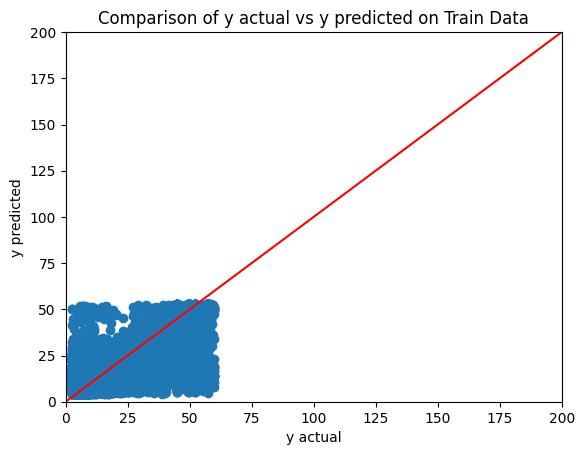

In [59]:
# Visualize & compare the prediction
plt.scatter(y_train, y_train_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

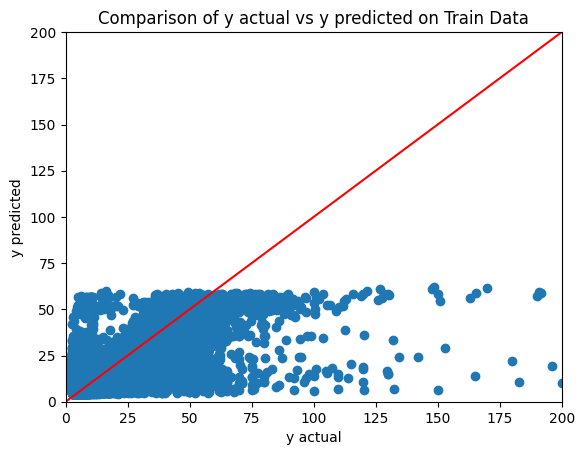

In [ ]:
# Visualize & compare the prediction
plt.scatter(y_train, y_train_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [60]:
# Predict
y_test_pred = reg_best.predict(X_test_clean)

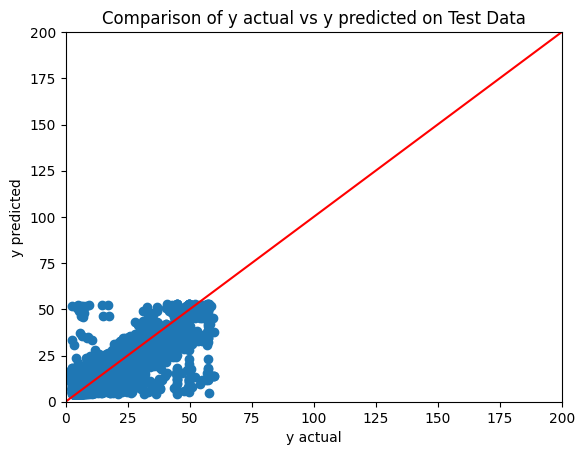

In [61]:
# Visualize & compare the prediction
plt.scatter(y_test, y_test_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()